In [1]:
###########################################################################################
# Code to automate the data extraction and creation of fundamental plots for the FE ASICs #
#                       --> Includes Cryocycles [0,5,20,100]                              #
#                               Author: Steven Doran                                      #
###########################################################################################

import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(100)                             # specify number of chips you are using for data
TotalCryo = int(3); Cryocycles = [5,20,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We staCT at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataCT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'CT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))
ENC = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        ee = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        en = ee.T[5]
        ENC[j][i] = en[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.

# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []; passENC = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []; failENC = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
    passENC.append(([])); failENC.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
        passENC[i].append(([])); failENC[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
                passENC[j][i].append((ENC[j][i][k]))
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))
                failENC[j][i].append((ENC[j][i][k]))

print('done')

done


### Histograms

In [30]:
#%matplotlib

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain
pE = []; fE = []            # ENC

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])
    pE.append([]); fE.append([])

# passMean[chip][cryo][data]
    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            fG[j].append(failGain[i][j][k])
            
for i in range(len(passENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(passENC[i][j])):
            pE[j].append(passENC[i][j][k])
for i in range(len(failENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(failENC[i][j])):
            fE[j].append(failENC[i][j][k])
            
#############################################################################
# Instead of applying a normal approximation for all CT distributions,
# we note that the distributions are not well approximated by Gaussians so 
# we should look to other distributions to more accurately compare statistical
# parameters. We will apply the same distribution to all seperate cryocycles.

# For RMS, ENC, and Mean, we choose a gamma distribution to approximate the data
# Gamma Distribution has E(x) = alpha/beta (shape-rate parametrization); V(x) = alpha/(beta^2)
# std. dev = sqrt(alpha)/beta
print('\nCT Mean, RMS, and ENC Distributions are well approximated as gamma distributions')
print('Gamma Distribution Parameters (shape-rate parametrization): ')
print('E(x) = shape*scale; V(x) = shape*(scale^2); std dev = sqrt(shape*(scale^2))')

# For gain, we can effectively approximate the data via a normal approximation
print('\nCT Gain Distributions are approximated as normal distributions')
print('Normal Distribution Parameters: ')
print('E(x) = mu; V(x) = sigma^2; std dev = sigma\n')

##############################################################################
################### Expectation and variance calculations ####################
##############################################################################

# Gain = Normal approximation
normGain5 = NormalDist.from_samples(pG[0])
G5_mean = normGain5.mean; G5_std = normGain5.stdev
G5m = 'CT5 ' + r'$\mu$' + ' = ' + str(round(G5_mean,1))
G5s = r'$\sigma$' + ' = ' + str(round(G5_std,1))
normGain20 = NormalDist.from_samples(pG[1])
G20_mean = normGain20.mean; G20_std = normGain20.stdev
G20m = 'CT20 ' + r'$\mu$' + ' = ' + str(round(G20_mean,1))
G20s = r'$\sigma$' + ' = ' + str(round(G20_std,1))
normGain100 = NormalDist.from_samples(pG[2])
G100_mean = normGain100.mean; G100_std = normGain100.stdev
G100m = 'CT100 ' + r'$\mu$' + ' = ' + str(round(G100_mean,1))
G100s = r'$\sigma$' + ' = ' + str(round(G100_std,1))

# RMS = Gamma approximation
fit_alpha5, fit_loc5, fit_beta5=stats.gamma.fit(pR[0], floc = min(pR[0]) - 0.1)
print('RMS CT[5] fits (shape, loc, scale) = ', fit_alpha5, fit_loc5, fit_beta5)
R5_mean = fit_loc5 + fit_alpha5*(fit_beta5); R5_var = fit_alpha5*(fit_beta5**2)
R5m = 'CT5 ' + r'$E(x)$' + ' = ' + str(round(R5_mean,1))
R5s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R5_var),1))
fit_alpha20, fit_loc20, fit_beta20=stats.gamma.fit(pR[1], floc = min(pR[1]) - 0.1)
print('RMS CT[20] fits (shape, loc, scale) = ', fit_alpha20, fit_loc20, fit_beta20)
R20_mean = fit_loc20 + fit_alpha20*(fit_beta20); R20_var = fit_alpha20*(fit_beta20**2)
R20m = 'CT20 ' + r'$E(x)$' + ' = ' + str(round(R20_mean,1))
R20s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R20_var),1))
fit_alpha100, fit_loc100, fit_beta100=stats.gamma.fit(pR[2], floc = min(pR[2]) - 0.1)
print('RMS CT[100] fits (shape, loc, scale) = ', fit_alpha100, fit_loc100, fit_beta100)
R100_mean = fit_loc100 + fit_alpha100*(fit_beta100); R100_var = fit_alpha100*(fit_beta100**2)
R100m = 'CT100 ' + r'$E(x)$' + ' = ' + str(round(R100_mean,1))
R100s = r'$\sigma$' + ' = ' + str(round(np.sqrt(R100_var),1))

# ENC = Gamma approximation
fit_alpha5, fit_loc5, fit_beta5=stats.gamma.fit(pE[0], floc = min(pE[0]) - 0.1)
print('ENC CT[5] fits (shape, loc, scale) = ', fit_alpha5, fit_loc5, fit_beta5)
E5_mean = fit_loc5 + fit_alpha5*(fit_beta5); E5_var = fit_alpha5*(fit_beta5**2)
E5m = 'CT5 ' + r'$E(x)$' + ' = ' + str(round(E5_mean,1))
E5s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E5_var),1))
fit_alpha20, fit_loc20, fit_beta20=stats.gamma.fit(pE[1], floc = min(pE[1]) - 0.1)
print('ENC CT[20] fits (shape, loc, scale) = ', fit_alpha20, fit_loc20, fit_beta20)
E20_mean = fit_loc20 + fit_alpha20*(fit_beta20); E20_var = fit_alpha20*(fit_beta20**2)
E20m = 'CT20 ' + r'$E(x)$' + ' = ' + str(round(E20_mean,1))
E20s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E20_var),1))
fit_alpha100, fit_loc100, fit_beta100=stats.gamma.fit(pE[2], floc = min(pE[2]) - 0.1)
print('ENC CT[100] fits (shape, loc, scale) = ', fit_alpha100, fit_loc100, fit_beta100)
E100_mean = fit_loc100 + fit_alpha100*(fit_beta100); E100_var = fit_alpha100*(fit_beta100**2)
E100m = 'CT100 ' + r'$E(x)$' + ' = ' + str(round(E100_mean,1))
E100s = r'$\sigma$' + ' = ' + str(round(np.sqrt(E100_var),1))

# Mean = Gamma approximation
fit_alpha5, fit_loc5, fit_beta5=stats.gamma.fit(pM[0], floc = min(pM[0]) - 0.1)
print('Mean CT[5] fits (shape, loc, scale) = ', fit_alpha5, fit_loc5, fit_beta5)
M5_mean = fit_loc5 + fit_alpha5*(fit_beta5); M5_var = fit_alpha5*(fit_beta5**2)
M5m = 'CT5 ' + r'$E(x)$' + ' = ' + str(round(M5_mean,1))
M5s = r'$\sigma$' + ' = ' + str(round(np.sqrt(M5_var),1))
fit_alpha20, fit_loc20, fit_beta20=stats.gamma.fit(pM[1], floc = min(pM[1]) - 0.1)
print('Mean CT[20] fits (shape, loc, scale) = ', fit_alpha20, fit_loc20, fit_beta20)
M20_mean = fit_loc20 + fit_alpha20*(fit_beta20); M20_var = fit_alpha20*(fit_beta20**2)
M20m = 'CT20 ' + r'$E(x)$' + ' = ' + str(round(M20_mean,1))
M20s = r'$\sigma$' + ' = ' + str(round(np.sqrt(M20_var),1))
fit_alpha100, fit_loc100, fit_beta100=stats.gamma.fit(pM[2],floc = min(pM[2]) - 0.1)
print('Mean CT[100] fits (shape, loc, scale) = ', fit_alpha100, fit_loc100, fit_beta100)
M100_mean = fit_loc100 + fit_alpha100*(fit_beta100); M100_var = fit_alpha100*(fit_beta100**2)
M100m = 'CT100 ' + r'$E(x)$' + ' = ' + str(round(M100_mean,1))
M100s = r'$\sigma$' + ' = ' + str(round(np.sqrt(M100_var),1))


R5 = pR[0]; M5 = pM[0]; G5 = pG[0]
R20 = pR[1]; M20 = pM[1]; G20 = pG[1]
R100 = pR[2]; M100 = pM[2]; G100 = pG[2]
E5 = pE[0]; E20 = pE[1]; E100 = pE[2]


########################################################################
# Limits
RMSlow = 0.; RMShigh = 50.
Meanlow = 0; Meanhigh = 3400
Gainlow = 20; Gainhigh = 86.
ENClow = 0.; ENChigh = 1500.

###################################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal RMS CT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
e = max(R5)-min(R5); f = max(R20)-min(R20); g = max(R100) - min(R100)
ratio = f/e; ratio1 = g/e
binsR5 = 200; binsR20 = int(binsR5*ratio); binsR100 = int(binsR5*ratio1)

# CT[5]
ax.hist(R5, binsR5, histtype = 'step', hatch = '...', stacked = False, color = 'blue',
        linewidth = 1.5, label = 'Pedestal RMS CT[5]', density = True)

# CT[20]
ax.hist(R20, binsR20, histtype = 'step', hatch = '///', stacked = False, color = 'red',
        linewidth = 1.5, label = 'Pedestal RMS CT[20]', density = True)

# CT[100]
ax.hist(R100, binsR100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black',
        linewidth = 1.5, label = 'Pedestal RMS CT[100]', density = True)

ax.text(.24,0.92,R5m,size = 8,transform = ax.transAxes)
ax.text(.29,0.87,R5s,size = 8,transform = ax.transAxes)
ax.text(.24,0.82,R20m,size = 8,transform = ax.transAxes)
ax.text(.29,0.77,R20s,size = 8,transform = ax.transAxes)
ax.text(.24,0.72,R100m,size = 8,transform = ax.transAxes)
ax.text(.29,0.67,R100s,size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS CT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

###################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal Mean CT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
c = max(M5)-min(M5); d = max(M20)-min(M20); e = max(M100) - min(M100)
ratio = d/c; ratio1 = e/c
binsM5 = 70; binsM20 = int(binsM5*ratio); binsM100 = int(binsM5*ratio1)

# CT[5]
ax.hist(M5, binsM5, histtype = 'step', hatch = '...', stacked = False, color = 'blue',
        linewidth = 1.5, label = 'Pedestal Mean CT[5]', density = True)

# CT[20]
ax.hist(M20, binsM20, histtype = 'step', hatch = '///', stacked = False, color = 'red',
        linewidth = 1.5, label = 'Pedestal Mean CT[20]', density = True)

# CT[100]
ax.hist(M100, binsM100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black',
        linewidth = 1.5, label = 'Pedestal Mean CT[100]', density = True)

ax.text(.04,0.92,M5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,M5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,M20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,M20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,M100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,M100s,size = 8,transform = ax.transAxes)

ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path2 = '../../../../Mean CT.png'
plt.savefig(path2,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

###################################################################################

# Gain
fig, ax = plt.subplots()
ax.set_title('ASIC Gain CT | Passed Channels 200mV BL')
ax.set_xlabel('Gain [e-/adc]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
g = max(G5)-min(G5); h = max(G20)-min(G20); ii = max(G100) - min(G100)
ratio = h/g; ratio1 = ii/g
binsG5 = 175; binsG20 = int(binsG5*ratio); binsG100 = int(binsG5*ratio1)

# CT[5]
ax.hist(G5, binsG5, histtype = 'step', hatch = '...', stacked = False, color = 'blue',
        linewidth = 1.5, label = 'Gain CT[5]', density = True)

# CT[20]
ax.hist(G20, binsG20, histtype = 'step', hatch = '///', stacked = False, color = 'red',
        linewidth = 1.5, label = 'Gain CT[20]', density = True)

# CT[100]
ax.hist(G100, binsG100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black',
        linewidth = 1.5, label = 'Gain CT[100]', density = True)

ax.text(.04,0.92,G5m,size = 8,transform = ax.transAxes)
ax.text(.09,0.87,G5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,G20m,size = 8,transform = ax.transAxes)
ax.text(.09,0.77,G20s,size = 8,transform = ax.transAxes)
ax.text(.04,0.72,G100m,size = 8,transform = ax.transAxes)
ax.text(.09,0.67,G100s,size = 8,transform = ax.transAxes)

ax.set_xlim([Gainlow,Gainhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path3 = '../../../../Gain CT.png'
plt.savefig(path3,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################

# ENC
fig, ax = plt.subplots()
ax.set_title('ASIC ENC CT | Passed Channels 200mV BL')
ax.set_xlabel('ENC [e-]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
xx = max(E5)-min(E5); yy = max(E20)-min(E20); zz = max(E100) - min(E100)
ratio = yy/xx; ratio1 = zz/xx
binsE5 = 350; binsE20 = int(binsE5*ratio); binsE100 = int(binsE5*ratio1)

# CT[5]
ax.hist(E5, binsE5, histtype = 'step', hatch = '...', stacked = False, color = 'blue',
        linewidth = 1.5, label = 'ENC CT[5]', density = True)

# CT[20]
ax.hist(E20, binsE20, histtype = 'step', hatch = '///', stacked = False, color = 'red',
        linewidth = 1.5, label = 'ENC CT[20]', density = True)

# CT[100]
ax.hist(E100, binsE100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black',
        linewidth = 1.5, label = 'ENC CT[100]', density = True)


ax.text(.30,0.92,E5m,size = 8,transform = ax.transAxes)
ax.text(.35,0.87,E5s,size = 8,transform = ax.transAxes)
ax.text(.30,0.82,E20m,size = 8,transform = ax.transAxes)
ax.text(.35,0.77,E20s,size = 8,transform = ax.transAxes)
ax.text(.30,0.72,E100m,size = 8,transform = ax.transAxes)
ax.text(.35,0.67,E100s,size = 8,transform = ax.transAxes)

ax.set_xlim([ENClow,ENChigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../ENC CT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

###############################################################################

print('done')

# Number of Channels with high noise
'''
count = 0
for i in range(len(E5)):
    if E5[i] < 1000:
        count = count + 1
print(count/len(E5))
print(count)
print(len(E5))
'''


CT Mean, RMS, and ENC Distributions are well approximated as gamma distributions
Gamma Distribution Parameters (shape-rate parametrization): 
E(x) = shape*scale; V(x) = shape*(scale^2); std dev = sqrt(shape*(scale^2))

CT Gain Distributions are approximated as normal distributions
Normal Distribution Parameters: 
E(x) = mu; V(x) = sigma^2; std dev = sigma

RMS CT[5] fits (shape, loc, scale) =  1.6236768697873176 2.14992 4.449889413500463
RMS CT[20] fits (shape, loc, scale) =  1.4739374484385515 2.4275599999999997 4.798428434668139
RMS CT[100] fits (shape, loc, scale) =  0.8181842759002765 1.9834800000000001 14.78099731156738
ENC CT[5] fits (shape, loc, scale) =  1.5139526598790352 127.5 253.0178025307131
ENC CT[20] fits (shape, loc, scale) =  1.2599735364225235 155.4 283.0195512354112
ENC CT[100] fits (shape, loc, scale) =  0.8154598734907649 115.10000000000001 797.4624828067717
Mean CT[5] fits (shape, loc, scale) =  5.782289327435947 913.019 118.88049768617607
Mean CT[20] fits (shape

In [66]:
from scipy.stats import gamma
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10,.1)
y1 = np.random.gamma(shape=1, scale=1, size=1000) + 2  # sets loc = 2 
y2 = np.hstack((y1, 10*np.random.rand(100)))  # add noise from 0 to 10

# fit the distributions, get the PDF distribution using the parameters
shape1, loc1, scale1 = gamma.fit(y1)
g1 = gamma.pdf(x=x, a=shape1, loc=loc1, scale=scale1)

shape2, loc2, scale2 = gamma.fit(y2)
g2 = gamma.pdf(x=x, a=shape2, loc=loc2, scale=scale2)

# again fit the distribution, but force loc=2
shape3, loc3, scale3 = gamma.fit(y2, floc=2)
g3 = gamma.pdf(x=x, a=shape3, loc=loc3, scale=scale3)

# plot the distributions and fits.  to lazy to do iteration today
fig, axes = plt.subplots(1, 3, figsize=(13,4))
ax = axes[0]
ax.hist(y1, bins=40, normed=True);
ax.plot(x, g1, 'r-', linewidth=6, alpha=.6)
ax.annotate(s='shape = %.3f\nloc = %.3f\nscale = %.3f' %(shape1, loc1, scale1), xy=(6,.2))
ax.set_title('gamma fit')

ax = axes[1]
ax.hist(y2, bins=40, normed=True);
ax.plot(x, g2, 'r-', linewidth=6, alpha=.6)
ax.annotate(s='shape = %.3f\nloc = %.3f\nscale = %.3f' %(shape2, loc2, scale2), xy=(6,.2))
ax.set_title('gamma fit with noise')

ax = axes[2]
ax.hist(y2, bins=40, normed=True);
ax.plot(x, g3, 'r-', linewidth=6, alpha=.6)
ax.annotate(s='shape = %.3f\nloc = %.3f\nscale = %.3f' %(shape3, loc3, scale3), xy=(6,.2))
ax.set_title('gamma fit w/ noise, location forced')

FitDataError: Invalid values in `data`.  Maximum likelihood estimation with 'gamma' requires that 2 < x < inf for each x in `data`.

### Failed Distributions

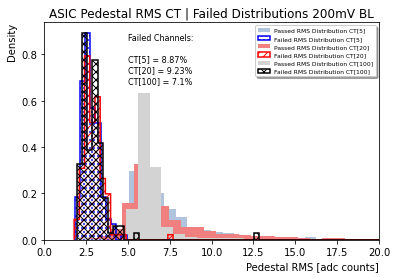

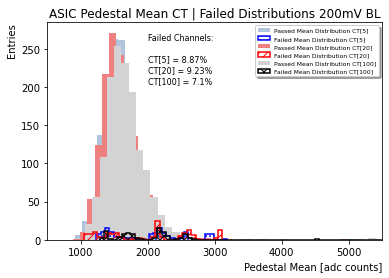

done


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain
pE = []; fE = []            # ENC

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])
    pE.append([]); fE.append([])

# passMean[chip][cryo][data]

# omit disconnections:    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            if 6500 > failMean[i][j][k] > 5500.:
                junk = 1
            else:
                fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            if 6500 > failMean[i][j][k] > 5500.:
                junk = 1
            else:
                fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            if 6500 > failMean[i][j][k] > 5500.:
                junk = 1
            else:
                fG[j].append(failGain[i][j][k])
            
for i in range(len(passENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(passENC[i][j])):
            pE[j].append(passENC[i][j][k])
for i in range(len(failENC)):
    for j in range(len(Cryocycles)):
        for k in range(len(failENC[i][j])):
            if 6500 > failMean[i][j][k] > 5500.:
                junk = 1
            else:
                fE[j].append(failENC[i][j][k])
                
'''
Total Number of Channels, excluding disconnections for CT:
CT[5]:  1590
CT[20]:  1584
CT[100]:  1524
'''
CC5 = 1590
CC20 = 1584
CC100 = 1524


R5 = pR[0]; M5 = pM[0]; G5 = pG[0]
R20 = pR[1]; M20 = pM[1]; G20 = pG[1]
R100 = pR[2]; M100 = pM[2]; G100 = pG[2]
E5 = pE[0]; E20 = pE[1]; E100 = pE[2]

fR5 = fR[0]; fM5 = fM[0]; fG5 = fG[0]
fR20 = fR[1]; fM20 = fM[1]; fG20 = fG[1]
fR100 = fR[2]; fM100 = fM[2]; fG100 = fG[2]
fE5 = fE[0]; fE20 = fE[1]; fE100 = fE[2]

'''The focus of these plots are for the failed distributions, so we dont need to worry about
statistics on the passed distributions - aka no Gaussian fitting for mean, sigma'''

########################################################################
# Limits
RMSlow = 0.; RMShigh = 20.
Meanlow = 500.; Meanhigh = 5500.

###################################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal RMS CT | Failed Distributions 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Density', loc = 'top')

# Proper Binning
# Passed
e = max(R5)-min(R5); f = max(R20)-min(R20); g = max(R100)-min(R100)
ratio = f/e; ratio1 = g/e
binsR5 = 250; binsR20 = int(binsR5*ratio); binsR100 = int(binsR5*ratio1)
# Failed
ee = max(fR5)-min(fR5); ff = max(fR20)-min(fR20); gg = max(fR100)-min(fR100)
fratio = ff/ee; fratio1 = gg/ee
fbinsR5 = 75; fbinsR20 = int(fbinsR5*fratio); fbinsR100 = int(fbinsR5*fratio1)

# CT[5]
ax.hist(R5, binsR5, histtype = 'stepfilled', stacked = False, color = 'lightsteelblue', linewidth = 1.5,
             label = 'Passed RMS Distribution CT[5]', density = True)

ax.hist(fR5, fbinsR5, histtype = 'step', hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Failed RMS Distribution CT[5]', density = True)

# CT[20]
ax.hist(R20, binsR20, histtype = 'stepfilled', stacked = False, color = 'lightcoral', linewidth = 1.5,
             label = 'Passed RMS Distribution CT[20]', density = True)

ax.hist(fR20, fbinsR20, histtype = 'step', hatch = '///', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Failed RMS Distribution CT[20]', density = True)

# CT[100]
ax.hist(R100, binsR100, histtype = 'stepfilled', stacked = False, color = 'lightgrey', linewidth = 1.5,
             label = 'Passed RMS Distribution CT[100]', density = True)

ax.hist(fR100, fbinsR100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Failed RMS Distribution CT[100]', density = True)

count = []
for j in range(len(Cryocycles)):
    count.append(len(fR[j]))

ax.text(.25,0.92,'Failed Channels:',size = 8,transform = ax.transAxes)
ax.text(.25,0.82,'CT[5] = ' + str(round(100*(count[0]/(count[0]+len(pR[0]))),2)) + '%', size = 8,transform = ax.transAxes)
ax.text(.25,0.77,'CT[20] = ' + str(round(100*(count[1]/(count[1]+len(pR[1]))),2)) + '%', size = 8,transform = ax.transAxes)
ax.text(.25,0.72,'CT[100] = ' + str(round(100*(count[2]/(count[2]+len(pR[2]))),2)) + '%', size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS CT Failed.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

###################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASIC Pedestal Mean CT | Failed Distributions 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Entries', loc = 'top')

# Proper Binning
# Passed
e = max(M5)-min(M5); f = max(M20)-min(M20); g = max(M100)-min(M100)
ratio = f/e; ratio1 = g/e
binsM5 = 40; binsM20 = int(binsM5*ratio); binsM100 = int(binsM5*ratio1)
# Failed
ee = max(fM5)-min(fM5); ff = max(fM20)-min(fM20); gg = max(fM100)-min(fM100)
fratio = ff/ee; fratio1 = gg/ee
fbinsM5 = 30; fbinsM20 = int(fbinsM5*fratio); fbinsM100 = int(fbinsM5*fratio1)

# CT[5]
ax.hist(M5, binsM5, histtype = 'stepfilled', stacked = False, color = 'lightsteelblue', linewidth = 1.5,
             label = 'Passed Mean Distribution CT[5]')#, density = True)

ax.hist(fM5, fbinsM5, histtype = 'step', hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Failed Mean Distribution CT[5]')#, density = True)

# CT[20]
ax.hist(M20, binsM20, histtype = 'stepfilled', stacked = False, color = 'lightcoral', linewidth = 1.5,
             label = 'Passed Mean Distribution CT[20]')#, density = True)

ax.hist(fM20, fbinsM20, histtype = 'step', hatch = '///', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Failed Mean Distribution CT[20]')#, density = True)

# CT[20]
ax.hist(M100, binsM100, histtype = 'stepfilled', stacked = False, color = 'lightgrey', linewidth = 1.5,
             label = 'Passed Mean Distribution CT[100]')#, density = True)

ax.hist(fM100, fbinsM100, histtype = 'step', hatch = 'xxx', stacked = False, color = 'black', linewidth = 1.5,
             label = 'Failed Mean Distribution CT[100]')#, density = True)

# Count Number of failed channels (not disconnections)
count = []
for j in range(len(Cryocycles)):
    count.append(len(fM[j]))

ax.text(.30,0.92,'Failed Channels:',size = 8,transform = ax.transAxes)
ax.text(.30,0.82,'CT[5] = ' + str(round(100*(count[0]/(count[0]+len(pM[0]))),2)) + '%', size = 8,transform = ax.transAxes)
ax.text(.30,0.77,'CT[20] = ' + str(round(100*(count[1]/(count[1]+len(pM[1]))),2)) + '%', size = 8,transform = ax.transAxes)
ax.text(.30,0.72,'CT[100] = ' + str(round(100*(count[2]/(count[2]+len(pM[2]))),2)) + '%', size = 8,transform = ax.transAxes)

ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Mean CT Failed.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()
###################################################################################
# Gain and ENC Unnecessary since they are automatically set to [-1,0,1] if failed
print('done')

In [33]:
import statistics
statistics.median(pR[2])

6.22586

In [34]:
for c in range(len(Cryocycles)):
    count = 0
    for i in range(len(pR[c])):
        if pR[c][i] > 15:
            count = count + 1
    print(Cryocycles[c], count)

5 110
20 131
100 198
